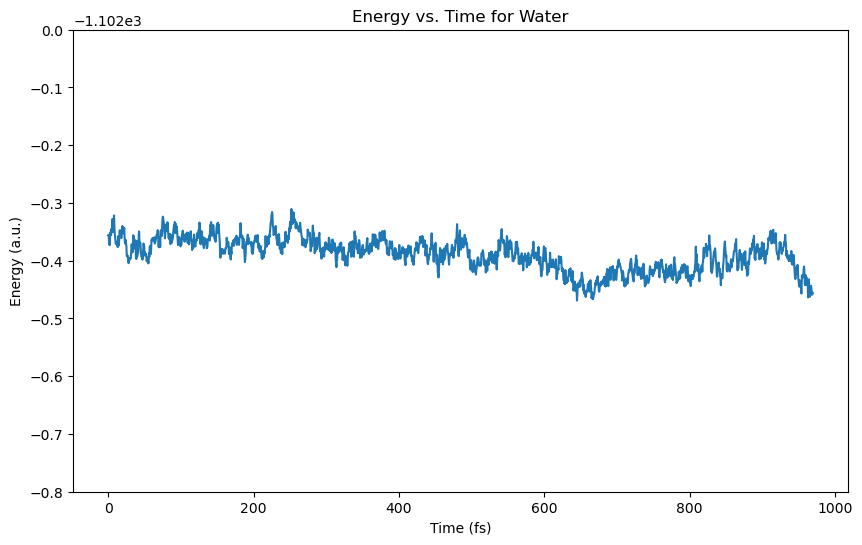

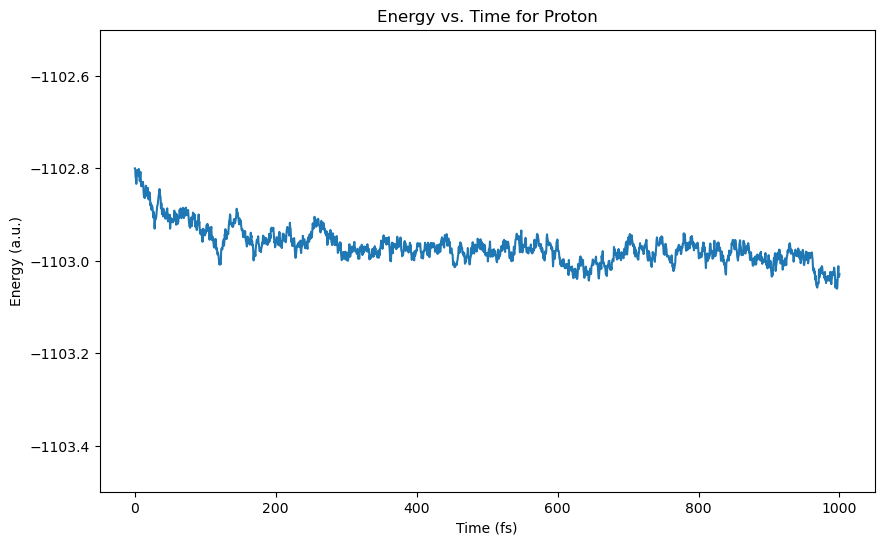

  0%|          | 0/1940 [00:00<?, ?it/s]/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
100%|██████████| 1940/1940 [00:01<00:00, 1106.71it/s]
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


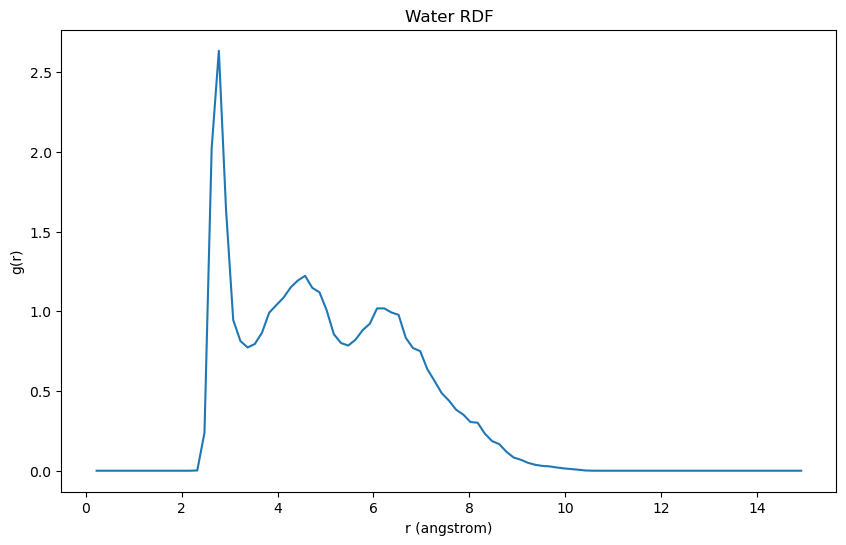

100%|██████████| 2001/2001 [00:01<00:00, 1144.90it/s]


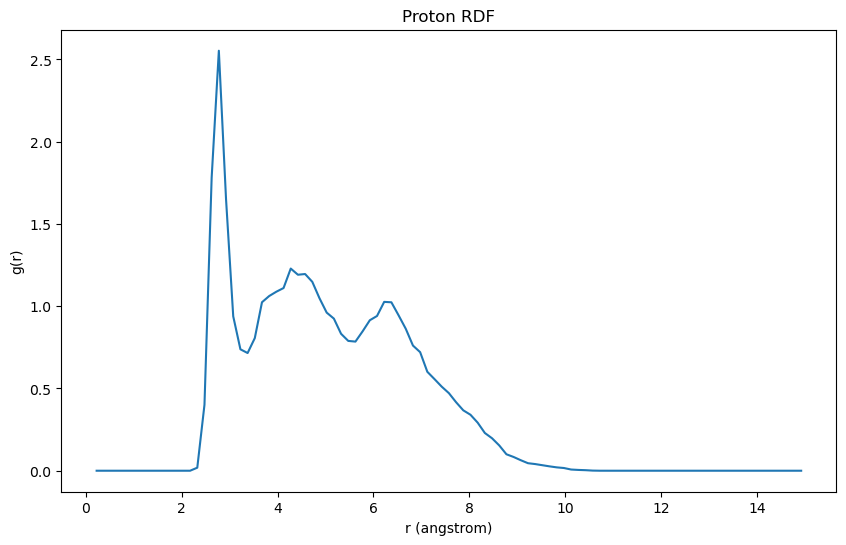

In [5]:
# Analysis for Week 12

# Import libraries
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import matplotlib.pyplot as plt

# Energy Plots

# Load file for water
water_file = '../Runs/Water/water_aimd_1ns_every0.5fs-1.ener'
water_en = np.loadtxt(water_file)

# Plot energy vs time for water
plt.figure(figsize=(10, 6))
plt.title('Energy vs. Time for Water')
plt.plot(water_en[:,1], water_en[:,2] + water_en[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.ylim((-1102.8, -1102))
plt.show()

# Load file for proton
proton_file = '../Runs/Proton/proton_aimd_1ns_every0.5fs-1.ener'
proton_en = np.loadtxt(proton_file)

# Plot energy vs time for proton
plt.figure(figsize=(10, 6))
plt.title('Energy vs. Time for Proton')
plt.plot(proton_en[:,1], proton_en[:,2] + proton_en[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.ylim((-1103.5, -1102.5))
plt.show()

# Radial Distribution Function

# Water RDF
u = mda.Universe('../Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz')
u.dimensions = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]
ag1 = u.select_atoms('name O')
water_rdf = rdf.InterRDF(ag1, ag1, nbins=100, verbose=True)
water_rdf.run()

plt.figure(figsize=(10, 6))
plt.title('Water RDF')
plt.ylabel('g(r)')
plt.xlabel('r (angstrom)')
plt.plot(water_rdf.bins[1:], water_rdf.rdf[1:])
plt.show()

# Proton RDF
u = mda.Universe('../Runs/Proton/proton_aimd_1ns_every0.5fs-pos-1.xyz')
u.dimensions = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]
ag1 = u.select_atoms('name O')
proton_rdf = rdf.InterRDF(ag1, ag1, nbins=100, verbose=True)
proton_rdf.run()

plt.figure(figsize=(10, 6))
plt.title('Proton RDF')
plt.ylabel('g(r)')
plt.xlabel('r (angstrom)')
plt.plot(proton_rdf.bins[1:], proton_rdf.rdf[1:])
plt.show()
